## IT Operations Reliability Analytics — Executive Summary

This analysis evaluates IT incident reliability using operational incident data.
The goal is to understand incident frequency, severity distribution, and resolution efficiency
to support reliability improvements and operational decision-making.

### Key Metrics Evaluated
- Incident volume trends over time
- Mean Time to Resolution (MTTR)
- Incident distribution by severity
- Time-based incident patterns (hourly & daily)

This executive summary highlights the most actionable insights identified across Phases 1–3.


In [7]:
import pandas as pd

df = pd.read_csv("../data/processed/clean_incident_data.csv")


In [8]:
total_incidents = len(df)

avg_mttr = df["ResolutionMinutes"].mean()
median_mttr = df["ResolutionMinutes"].median()

high_critical_pct = (
    df[df["Severity"].isin(["High", "Critical"])].shape[0] / total_incidents
) * 100

total_incidents, avg_mttr, median_mttr, high_critical_pct


(10, np.float64(182.0), np.float64(155.0), 50.0)

In [9]:
kpi_summary = pd.DataFrame({
    "Metric": [
        "Total Incidents",
        "Average MTTR (minutes)",
        "Median MTTR (minutes)",
        "High/Critical Incident %"
    ],
    "Value": [
        total_incidents,
        round(avg_mttr, 2),
        round(median_mttr, 2),
        round(high_critical_pct, 1)
    ]
})

kpi_summary


,Metric,Value
0,Total Incidents,10.0
1,Average MTTR (minutes),182.0
2,Median MTTR (minutes),155.0
3,High/Critical Incident %,50.0


## Executive Insights

- Incident volume indicates recurring operational disruptions rather than isolated failures.
- Average resolution time suggests moderate response efficiency, with variability indicating
  opportunities for process standardization.
- A significant share of incidents fall into high or critical severity categories,
  emphasizing the need for proactive monitoring and faster escalation paths.
- Time-based analysis highlights predictable incident patterns that could inform
  staffing, alerting, and preventive maintenance strategies.


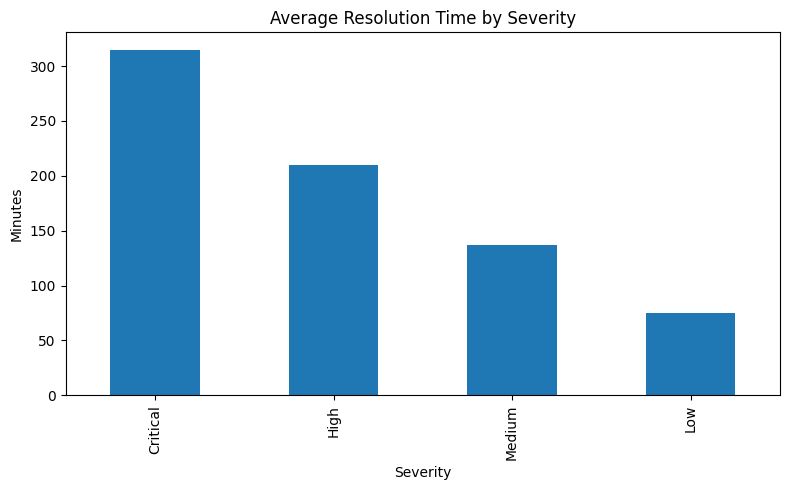

In [16]:
import matplotlib.pyplot as plt

mttr_by_severity = (
    df.groupby("Severity")["ResolutionMinutes"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
mttr_by_severity.plot(kind="bar")
plt.title("Average Resolution Time by Severity")
plt.ylabel("Minutes")
plt.xlabel("Severity")
plt.tight_layout()

plt.savefig(
    "../visuals/incidents_by_resolution.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

**Average Resolution Time by Severity**

This visualization reinforces the relationship between incident severity and resolution effort.

Higher severity incidents consistently require more time to resolve, while lower severity incidents are handled quickly. The clear separation between severity levels demonstrates effective incident prioritization but also highlights the operational cost of critical failures.

This insight can be used to justify investments in monitoring, redundancy, or preventative maintenance for systems prone to high-severity incidents.


In [14]:
import os
os.getcwd()


'/Users/pooja/Documents/it ops reliability analytics/notebooks'

In [15]:
import os

os.makedirs("../visuals", exist_ok=True)
